In [3]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

23992


# 0. fov parameters

In [4]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA',
             'save_folder':r'D:\Pu_Temp\20210930-Thymus_AireKO-GFP_CTP-10_DNA',
             'experiment_type': 'DNA',
             'num_threads': 13,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'D:\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': None,
                     'spot_seeding_th': 600,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             'ref_id': 0, # special for this experiment
             }


# process fov in batch

In [4]:
from scipy import ndimage
from skimage import exposure
from skimage import morphology

#aire_im = protein_ims[0]

# Adaptive Equalization
#aire_adapteq_im = exposure.equalize_adapthist(aire_im, clip_limit=0.03)

def generate_analysis_mask(image, gaussian_size=6., snr_th=3):
    from scipy import ndimage
    # gaussian blur this image to ignore internal feature
    seg_im = ndimage.gaussian_filter(image.copy(), gaussian_size)
    seg_im = seg_im / io_tools.load.find_image_background(seg_im)
    mask = seg_im > snr_th
    return mask.astype(np.bool)

#aire_mask = generate_analysis_mask(aire_im)

#dialate_size = 2
#dialated_mask = ndimage.binary_dilation(aire_mask, morphology.ball(dialate_size))

In [5]:
_fov_id = 3
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 28
- Number of field of views: 113
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0P1', 'H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25P1'])
- 27 folders are found according to color-usage annotation.
+ creating save folder: D:\Pu_Temp\20210930-Thymus_AireKO-GFP_CTP-10_DNA
+ creating drift folder: \\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\Analysis\drift
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction p

<IPython.core.display.Javascript object>


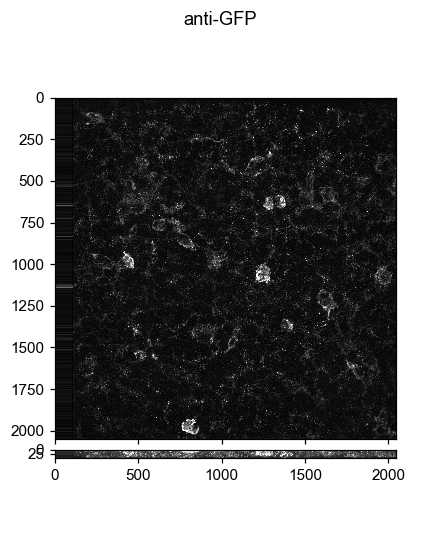

In [10]:
# 2.0: create a seed mask from protein image Aire
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['protein']
    protein_ims = _grp['ims'][:]
    protein_ids = _grp['ids'][:]
    
visual_tools.imshow_mark_3d_v2(protein_ims, image_names=['anti-GFP','Aire'])

In [7]:
# 5. Process Protein images
fov.parallel=False
fov.protein_ref_id = 0
fov._process_image_to_spots('protein', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=True,
                            _fit_spots=False,
                            _overwrite_drift=False, _overwrite_image=False,
                            _overwrite_spot=True,
                            _verbose=True)

-- No folder selected, allow processing all 27 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax  in 5.955s
-- removing hot pixels for channels:['488'] in 3.844s
-- correct Z-shifts for channels:['488'] in 3.219s
-- illumination correction for channels: 488, in 1.188s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.510s
-- saving fov_info to file: D:\Pu_Temp\20210930-Thymus_AireKO-GFP_CTP-10_DNA\Conv_zscan_003.hdf5
++ base attributes saved:['protein_ref_im'] in 4.393s.
-- checking protein, region:[1 2] in 0.000

In [8]:
# 2. Process image into candidate spots
fov.parallel=True
fov.combo_ref_id = 0
fov._process_image_to_spots('combo', 
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=False, 
                            _fit_spots=False,
                            #_fit_in_mask=True,
                            #_fitting_args={'seed_mask':dialated_mask},
                            _overwrite_drift=False, _overwrite_image=False,
                            _overwrite_spot=False,
                            _verbose=True)

-- No folder selected, allow processing all 27 folders
+ load reference image from file:\\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210930-Thymus_AireKO-GFP_CTP-10_DNA\H0P1\Conv_zscan_003.dax  in 5.968s
-- removing hot pixels for channels:['488'] in 4.844s
-- correct Z-shifts for channels:['488'] in 3.922s
-- illumination correction for channels: 488, in 1.594s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.727s
-- saving fov_info to file: D:\Pu_Temp\20210930-Thymus_AireKO-GFP_CTP-10_DNA\Conv_zscan_003.hdf5
++ base attributes saved:['combo_ref_im'] in 5.158s.
-- checking combo, region:[1 2] in 0.000s.
-

In [12]:
_overwrite_image = False
_overwrite_spots = False
#bad fov: 24,38,45,54,67,72
fov_ids = np.arange(68,73)

for _fov_id in fov_ids:
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              )
    # 5. Process Protein images
    fov.parallel=False
    fov.protein_ref_id = 0
    fov._process_image_to_spots('protein', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True,
                                _fit_spots=False,
                                _overwrite_drift=False, _overwrite_image=_overwrite_image,
                                _overwrite_spot=True,
                                _verbose=True)
    
    # generate the dialated mask
    # 2.0: create a seed mask from protein image Aire
    with h5py.File(fov.save_filename, "r", libver='latest') as _f:
        _grp = _f['protein']
        protein_ims = _grp['ims'][:]
        #protein_ids = _grp['ids'][:]
    aire_im = protein_ims[0]
    aire_mask = generate_analysis_mask(aire_im)
    dialate_size = 5
    dialated_mask = ndimage.binary_dilation(aire_mask, morphology.ball(dialate_size))
    
    # 2. Process image into candidate spots
    fov.parallel=True
    fov.combo_ref_id = 0
    #fov._save_to_file('combo')
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _fit_in_mask=True,
                                _fitting_args={'seed_mask':dialated_mask},
                                _overwrite_drift=False, _overwrite_image=_overwrite_image,
                                _overwrite_spot=_overwrite_spots,
                                _verbose=True)
    # 4. load dapi image
    dapi_im = fov._load_dapi_image(_dapi_id=0)


    # delete
    del(aire_im, aire_mask, dialated_mask)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 26
- Number of field of views: 73
- Importing csv format color_usage file: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25P1'])
- 26 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_68.hdf5
++ base attributes loaded:['3581c0cc55e74544bcb088210875c00a', 'combo_ref_im', 'dapi_im', 'protein_ref_im'] in 2.514s.
+ loading correction from file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_68.hdf5
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile 

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


-- No folder selected, allow processing all 26 folders
-- checking combo, region:[1 2] in 0.016s.
-- checking combo, region:[3 4] in 0.000s.
-- checking combo, region:[5 6] in 0.000s.
-- checking combo, region:[7 8] in 0.000s.
-- checking combo, region:[ 9 10] in 0.016s.
-- checking combo, region:[11 12] in 0.000s.
-- checking combo, region:[13 14] in 0.000s.
-- checking combo, region:[15 16] in 0.000s.
-- checking combo, region:[17 18] in 0.000s.
-- checking combo, region:[19 20] in 0.016s.
-- checking combo, region:[21 22] in 0.000s.
-- checking combo, region:[23 24] in 0.009s.
-- checking combo, region:[25 26] in 0.000s.
-- checking combo, region:[27 28] in 0.007s.
-- checking combo, region:[29 30] in 0.000s.
-- checking combo, region:[31 32] in 0.000s.
-- checking combo, region:[33 34] in 0.000s.
-- checking combo, region:[35 36] in 0.000s.
-- checking combo, region:[37 38] in 0.016s.
-- checking combo, region:[39 40] in 0.000s.
-- checking combo, region:[41 42] in 0.000s.
-- check

-- checking combo, region:[23 24] in 0.016s.
-- checking combo, region:[25 26] in 0.006s.
-- checking combo, region:[27 28] in 0.000s.
-- checking combo, region:[29 30] in 0.000s.
-- checking combo, region:[31 32] in 0.000s.
-- checking combo, region:[33 34] in 0.000s.
-- checking combo, region:[35 36] in 0.016s.
-- checking combo, region:[37 38] in 0.000s.
-- checking combo, region:[39 40] in 0.000s.
-- checking combo, region:[41 42] in 0.000s.
-- checking combo, region:[43 44] in 0.000s.
-- checking combo, region:[45 46] in 0.016s.
-- checking combo, region:[47 48] in 0.000s.
-- checking combo, region:[49 50] in 0.000s.
+ Start multi-processing of pre-processing for 25 images with 13 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] , finish in 548.37s.
directly return existing attribute.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of f

ValueError: not enough values to unpack (expected 3, got 0)

In [11]:
with h5py.File(fov.save_filename, "a", libver='latest') as _f:
    _grp = _f['combo']
    _spot_dataset = _grp['spots']
    print(_grp.keys())
    del(_grp['combo_ref_im'])

<KeysViewHDF5 ['channels', 'combo_ref_im', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>


In [25]:
for _basename in os.listdir(fov_param['save_folder'])[5:]:
    
    with h5py.File(os.path.join(fov_param['save_folder'], _basename), "a", libver='latest') as _f:
        print(os.path.join(fov_param['save_folder'], _basename))
        _grp = _f['combo']
        #_spot_dataset = _grp['spots']
        print(_grp.keys())
        #if 'spots' in _grp.keys():
        del(_grp['spots'])
        del(_grp['raw_spots'])
        print("recreate")
        _grp.create_dataset('spots',
                        (_grp['ids'].shape[0], 4000, 11), 
                        dtype='f', maxshape=(_grp['ids'].shape[0], None, 11), chunks=True)
        _grp.create_dataset('raw_spots',
                        (_grp['ids'].shape[0], 4000, 11), 
                        dtype='f', maxshape=(_grp['ids'].shape[0], None, 11), chunks=True)

    

D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_09.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_10.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_11.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_12.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_13.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_14.hdf5
<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
recreate
D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_15.hdf5
<KeysViewHDF5 ['chann

In [8]:
_overwrite_image = False
fov_ids = np.arange(6,73)

for _fov_id in fov_ids:
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              )

    # 2. Process image into candidate spots
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _fit_in_mask=True,
                                _fitting_args={'seed_mask':dialated_mask},
                                _overwrite_drift=False, _overwrite_image=_overwrite_image,
                                _overwrite_spot=False,
                                _verbose=True)
    # 4. load dapi image
    dapi_im = fov._load_dapi_image(_dapi_id=0)

    # 5. Process Protein images
    fov.parallel=False
    fov.protein_ref_id = 0
    fov._process_image_to_spots('protein', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=True,
                                _fit_spots=False,
                                _overwrite_drift=False, _overwrite_image=_overwrite_image,
                                _overwrite_spot=False,
                                _verbose=True)


Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 26
- Number of field of views: 73
- Importing csv format color_usage file: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25P1'])
- 26 folders are found according to color-usage annotation.
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
++ load illumination correction profile fro

-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1\Conv_zscan_67.dax  in 5.768s
-- removing hot pixels for channels:['488'] in 4.579s
-- correct Z-shifts for channels:['488'] in 4.234s
-- illumination correction for channels: 488, in 1.503s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.378s
-- saving fov_info to file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_67.hdf5
++ base attributes saved:['protein_ref_im'] in 5.127s.
used_channels: ['750', '647', '488', '405']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750', '647', '488']
used_channels: ['750'

 49 50] , finish in 520.61s.
-- choose dapi images from folder: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1.
- correct the whole fov for image: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1\Conv_zscan_68.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1\Conv_zscan_68.dax  in 6.078s
-- removing hot pixels for channels:['405'] in 4.095s
-- correct Z-shifts for channels:['405'] in 3.718s
-- illumination correction for channels: 405, in 1.469s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 15.735s
-- saving fov_info to file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_68.hdf5
++ base attributes saved:['dapi_im'] in 5.000s.
-- No folder selected, allow processing all 26 folders
+ load reference image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_D

-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1\Conv_zscan_69.dax  in 6.164s
-- removing hot pixels for channels:['488'] in 4.609s
-- correct Z-shifts for channels:['488'] in 4.109s
-- illumination correction for channels: 488, in 1.516s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.679s
-- saving fov_info to file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_69.hdf5
++ base attributes saved:['combo_ref_im'] in 5.163s.
-- checking combo, region:[1 2] in 0.000s.
used_channels: ['750', '647', '488', '405']
-- checking combo, region:[3 4] in 0.105s.
used_channels: ['750', '647', '488']
-- checking combo, region:[5 6] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[7 8] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[ 9 10] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[11 12] in 0.016s.
used_channels: ['750

-- saving 405_illumination profile to save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5.
-- saving 750_chromatic profile to save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5.
-- saving 647_chromatic profile to save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5.
-- 647_chromatic_constants profile already exist in save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5, skip.
-- saving 750_647_bleed profile to save_file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5.
dict_keys(['combo', 'protein'])
save type: combo"
-- saving combo to file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5
--- combo attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.000s.
save type

--- align image 0 in 5.508s.
--- align image 1 in 5.531s.
--- align image 2 in 5.531s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.15  1.94 23.26] in 16.781s
-- warp image with chromatic correction for channels: ['750'] and drift:[-0.15  1.94 23.26] 750, 647, in 148.750s
-- applying gaussian highpass filte, sigma=5 in 32.543s
-- finish correction in 235.426s
- writting protein info to file:D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_70.hdf5
-- updated ims for id:[1, 2], drifts for id:[1, 2] in 2.668s
-- update drift of H25P1\Conv_zscan_70.dax into file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\drift\Conv_zscan_70_current_cor.pkl
in 239.17s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 26
- Number of field of views: 73
- Importing csv format color_usage file: \\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405'

-- loading image from file:\\10.245.74.40\Turing3\Pu\Aire\20210729-Thymus_CTP10-Aire_DNA\H0C1\Conv_zscan_72.dax  in 5.999s
-- removing hot pixels for channels:['488'] in 4.734s
-- correct Z-shifts for channels:['488'] in 4.125s
-- illumination correction for channels: 488, in 1.453s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 16.663s
-- saving fov_info to file: D:\Pu_Temp\20210729-Thymus_CTP10-Aire_DNA\Conv_zscan_72.hdf5
++ base attributes saved:['combo_ref_im'] in 5.226s.
-- checking combo, region:[1 2] in 0.000s.
used_channels: ['750', '647', '488', '405']
-- checking combo, region:[3 4] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[5 6] in 0.016s.
used_channels: ['750', '647', '488']
-- checking combo, region:[7 8] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[ 9 10] in 0.000s.
used_channels: ['750', '647', '488']
-- checking combo, region:[11 12] in 0.000s.
used_channels: ['750